[0.02046562 0.02379012 0.02530179 0.03095165 0.03218294 0.03386875
 0.03884829 0.04012704 0.04519679 0.04639534 0.04912188 0.05081594
 0.06310851 0.07061206 0.07369419 0.07703152 0.07915577 0.08718083
 0.08832158 0.09920712 0.10354224 0.10961077 0.1101367  0.11613317
 0.12273586 0.1272138  0.1284681  0.14907042 0.16159776 0.17839711
 0.19061528 0.19099491 0.1949377  0.21050239 0.22012668 0.24399368
 0.25345004 0.25486587 0.2655032  0.26905095 0.27564399 0.28125761
 0.31422349 0.32477125 0.3338106  0.33411041 0.33744377 0.34642758
 0.36092442 0.37203454 0.37322075 0.38086234 0.38202998 0.38946586
 0.39160017 0.39366905 0.39427172 0.39595572 0.39756367 0.3975673
 0.39782032 0.39827917 0.39706706 0.39617415 0.39269451 0.3768343
 0.35894272 0.34667399 0.31667309 0.30406119 0.29372898 0.26684187
 0.25201813 0.25151955 0.23885496 0.20884521 0.19825163 0.19742777
 0.1841669  0.16438513 0.16150973 0.14151155 0.13813094 0.10926349
 0.10836153 0.09959515 0.08998167 0.08727878 0.07826343 0.072956

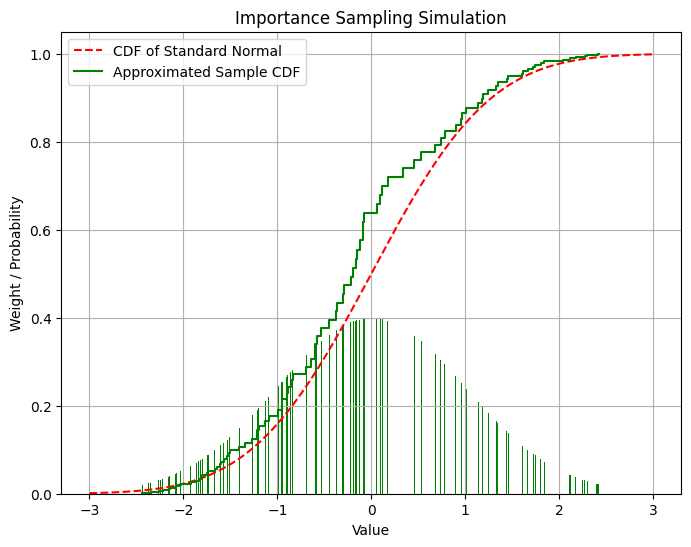

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# To simulate importance sampling, we'll sample 100 points from a uniform distribution between -2.5 and 2.5,
# and assign each sample a weight based on the probability density of the standard normal distribution at that sample.

# Sample from a uniform distribution
uniform_samples = np.random.uniform(-2.5, 2.5, 100)
uniform_samples.sort()

# Assign weights based on the standard normal distribution's probability density
weights = norm.pdf(uniform_samples)
print(weights)

# Sort the uniform samples for plotting the approximated sample CDF
cumulative_weights = np.cumsum(weights) / np.sum(weights)  # Normalize weights for CDF

# Plot the weighted samples, CDF of the standard normal, and the approximated sample CDF
plt.figure(figsize=(8, 6))

# Draw weighted samples as bars
for sample, weight in zip(uniform_samples, weights):
    plt.bar(sample, weight, width=0.01, color='green', bottom=0, align='center')

# Add the CDF of the standard normal distribution
x_values = np.linspace(-3, 3, 1000)
plt.plot(x_values, norm.cdf(x_values), label='CDF of Standard Normal', linestyle='--', color='red')

# Plot the approximated sample CDF
plt.step(uniform_samples, cumulative_weights, where='post', label='Approximated Sample CDF', color='green')

plt.title('Importance Sampling Simulation')
plt.xlabel('Value')
plt.ylabel('Weight / Probability')
plt.legend()
plt.grid(True)
plt.savefig('importance_sampling.png', dpi=300, bbox_inches='tight')

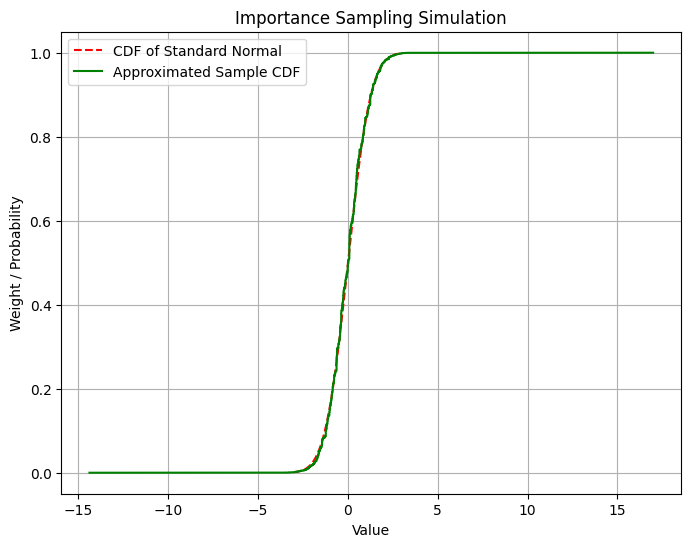

In [30]:
# Sample from multiple distributions

N = 1000
samples = []

target_mean = 0
target_sigma = 1

for i in range(N):
    sigma = np.random.uniform(0.5, 5)
    mean = np.random.uniform(-5, 5)
    sample = np.random.normal(mean, sigma)
    probability = norm.pdf(sample, loc=mean, scale=sigma)
    samples.append((sample, probability))

samples.sort(key=lambda x: x[0])

xs = [x for x, _ in samples]
weights = []

for sample, probability in samples:
    original_pdf = norm.pdf(sample, loc=target_mean, scale=target_sigma)
    weight = original_pdf / probability
    weights.append(weight)

cumulative_weights = np.cumsum(weights) / np.sum(weights)

plt.figure(figsize=(8, 6))

# Draw weighted samples as bars
# plt.bar(xs, weights, width=0.01, color='green', bottom=0, align='center')

# Add the CDF of the standard normal distribution
x_values = np.linspace(-3, 3, 1000)
plt.plot(x_values, norm.cdf(x_values), label='CDF of Standard Normal', linestyle='--', color='red')

# Plot the approximated sample CDF
plt.step([sample for sample, _ in samples], cumulative_weights, where='post', label='Approximated Sample CDF', color='green')

plt.title('Importance Sampling Simulation')
plt.xlabel('Value')
plt.ylabel('Weight / Probability')
plt.legend()
plt.grid(True)
plt.savefig('importance_sampling_multiple.png', dpi=300, bbox_inches='tight')
plt.show()
